In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# 한글 사용 준비
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
train_dt = pd.read_csv('titanic.csv')
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


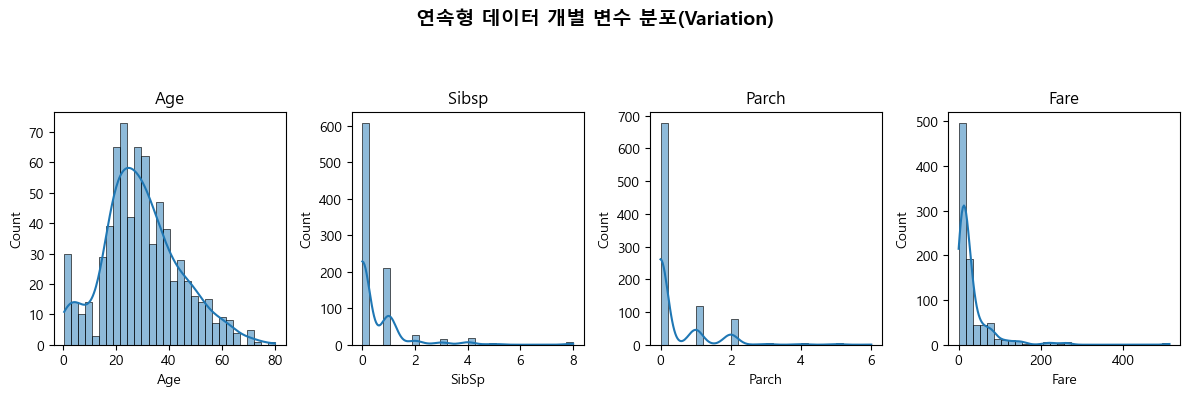

In [6]:
# 연속형 변수 선택
continuous_vars = ["Age", "SibSp", "Parch", "Fare"]

# 그래프 스타일 설정
plt.figure(figsize=(12, 4))
plt.suptitle("연속형 데이터 개별 변수 분포(Variation)", fontsize=14, fontweight="bold")

# 각 변수에 대한 분포 플롯 생성
for i, var in enumerate(continuous_vars):
    plt.subplot(1, 4, i+1)
    sns.histplot(train_dt[var], bins=30, kde=True)
    plt.title(var.capitalize())
    plt.xlabel(var)
    plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\2789276487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_dt[var], palette="muted")
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\2789276487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_dt[var], palette="muted")
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\2789276487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_dt[var], palette="muted")


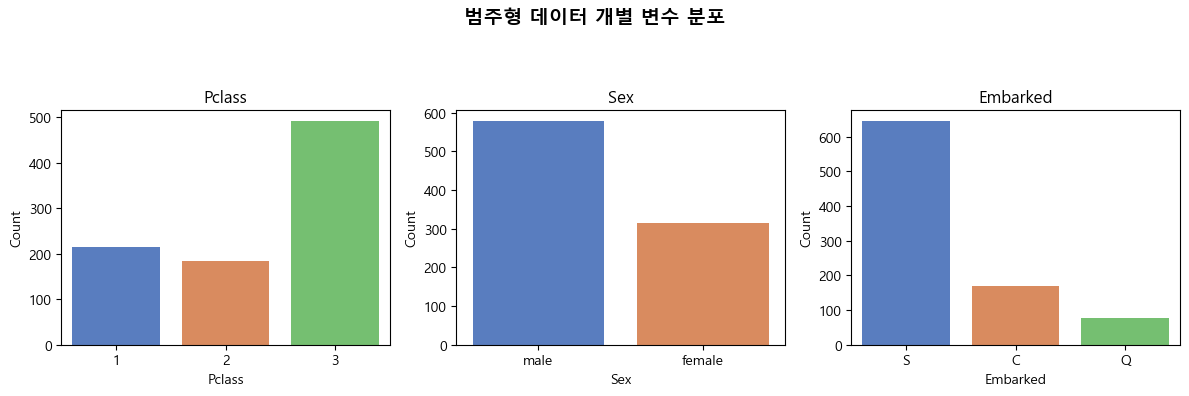

In [7]:
# 범주형 변수 선택
categorical_vars = ["Pclass", "Sex", "Embarked"]

# 그래프 스타일 설정
plt.figure(figsize=(12, 4))
plt.suptitle("범주형 데이터 개별 변수 분포", fontsize=14, fontweight="bold")

# 각 변수에 대한 카운트 플롯 생성
for i, var in enumerate(categorical_vars):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=train_dt[var], palette="muted")
    plt.title(var.capitalize())
    plt.xlabel(var)
    plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

In [8]:
train_dt['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\3315101394.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, ax=axes[1], palette=colors)


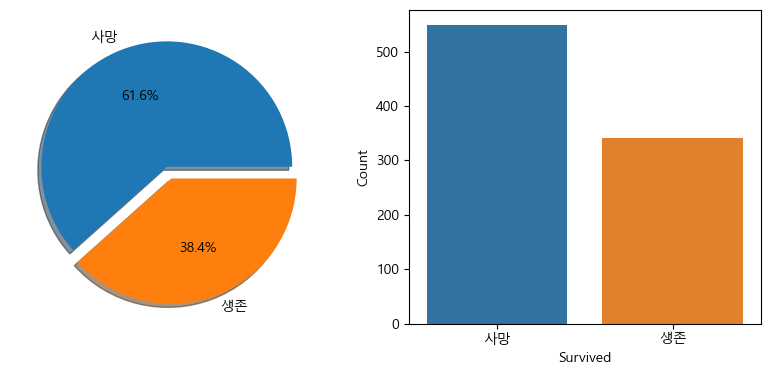

In [9]:
train_dt_copy = train_dt.copy()
# Survived 변수 매핑 (0: 사망, 1: 생존)
train_dt_copy["Survived"] = train_dt_copy["Survived"].map({0: "사망", 1: "생존"})


# 생존자 및 사망자 수 계산
survived_counts = train_dt_copy["Survived"].value_counts()
labels = survived_counts.index
sizes = survived_counts.values
colors = ["#1f77b4", "#ff7f0e"]
explode = [0, 0.1]  # 생존자 부분만 분리

# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 크기 조정
fig.suptitle("", fontsize=14, fontweight="bold")

# 파이 차트 (조각 분리)
axes[0].pie(
    sizes, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True
)
axes[0].set_title("")

# 바 차트
sns.barplot(x=labels, y=sizes, ax=axes[1], palette=colors)
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [12]:
train_dt['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [13]:
train_dt['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\576204693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=train_dt["Pclass"].value_counts().index,


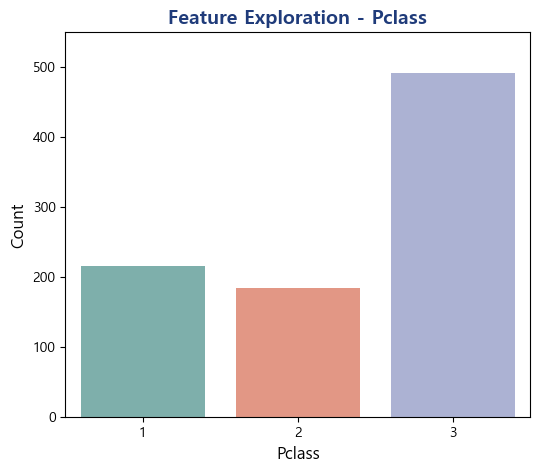

In [14]:
# 그래프 스타일 설정
plt.figure(figsize=(6, 5))

# 막대 그래프 생성
ax = sns.barplot(x=train_dt["Pclass"].value_counts().index, 
                 y=train_dt["Pclass"].value_counts().values, 
                 palette=["#76b7b2", "#f28e75", "#a5add9"])  # 색상 설정

# 제목 설정
plt.title("Feature Exploration - Pclass", fontsize=14, fontweight="bold", color="#1f3b7a")
plt.xlabel("Pclass", fontsize=12)
plt.ylabel("Count", fontsize=12)

# y축 눈금 설정
plt.ylim(0, 550)

plt.show()

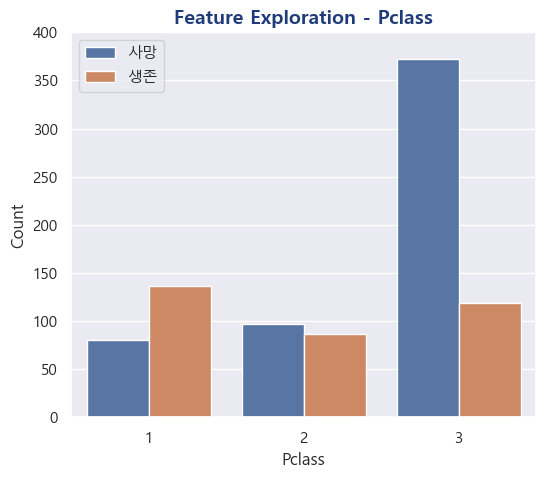

In [15]:
# 그래프 스타일 설정
plt.figure(figsize=(6, 5))
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})  

# 막대 그래프 생성 (Pclass별 Survived 분포)
ax = sns.countplot(data=train_dt, x="Pclass", hue="Survived", palette=["#4c72b0", "#dd8452"])

# 제목 및 축 설정
plt.title("Feature Exploration - Pclass", fontsize=14, fontweight="bold", color="#1f3b7a")
plt.xlabel("Pclass", fontsize=12)
plt.ylabel("Count", fontsize=12)

# 범례 설정
plt.legend(title="", labels=["사망", "생존"])

# y축 제한 설정
plt.ylim(0, 400)

plt.show()

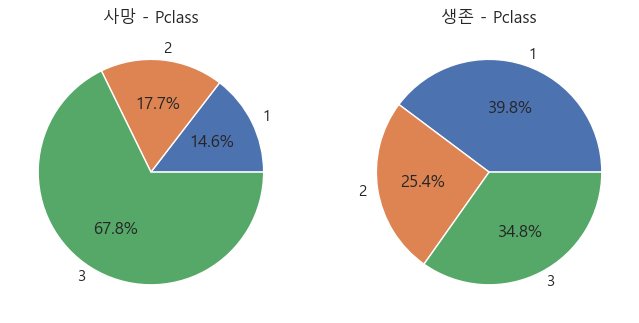

In [16]:
# 생존자와 사망자 그룹별 Pclass 비율 계산
dead_pclass = train_dt[train_dt["Survived"] == 0]["Pclass"].value_counts(normalize=True) * 100
survived_pclass = train_dt[train_dt["Survived"] == 1]["Pclass"].value_counts(normalize=True) * 100

# 파이 차트에 표시할 레이블 (Pclass 값)
labels = ["1", "2", "3"]
colors = ["#4c72b0", "#dd8452", "#55a868"]

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 사망자 파이 차트
axes[0].pie(dead_pclass.sort_index(), labels=labels, autopct="%1.1f%%", colors=colors)
axes[0].set_title("사망 - Pclass")

# 생존자 파이 차트
axes[1].pie(survived_pclass.sort_index(), labels=labels, autopct="%1.1f%%", colors=colors)
axes[1].set_title("생존 - Pclass")

plt.show()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\3615483749.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sex_counts, ax=axes[1], palette=colors)


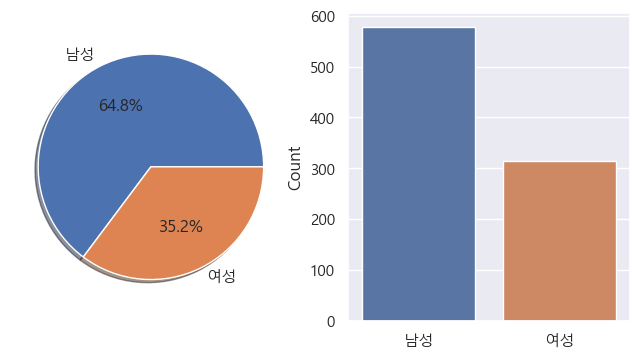

In [17]:
# 성별 분포 계산
sex_counts = train_dt["Sex"].value_counts()
sex_percent = train_dt["Sex"].value_counts(normalize=True) * 100

# 성별 한글 변환
labels = ["남성", "여성"]
colors = ["#4c72b0", "#dd8452"]
explode = [0.1, 0]  # 여성 부분만 분리

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 파이 차트
axes[0].pie(sex_percent, labels=labels, autopct="%1.1f%%", colors=colors, shadow=True)
axes[0].set_title("")

# 바 차트
sns.barplot(x=labels, y=sex_counts, ax=axes[1], palette=colors)
axes[1].set_ylabel("Count")

plt.show()


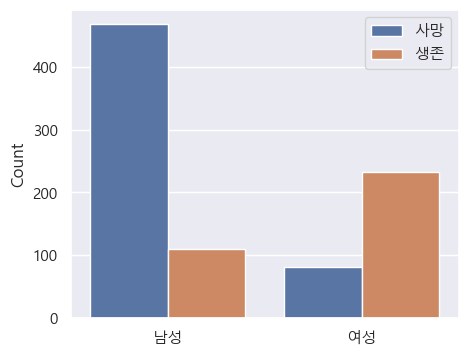

In [18]:
# 그래프 크기 설정
plt.figure(figsize=(5, 4))

# 성별에 따른 생존 여부 카운트 플롯
ax = sns.countplot(data=train_dt, x="Sex", hue="Survived", palette=["#4c72b0", "#dd8452"])

# 한글 라벨 적용
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["남성", "여성"], fontsize=11)

# 범례 설정
plt.legend(title="", labels=["사망", "생존"], loc="upper right")

plt.show()

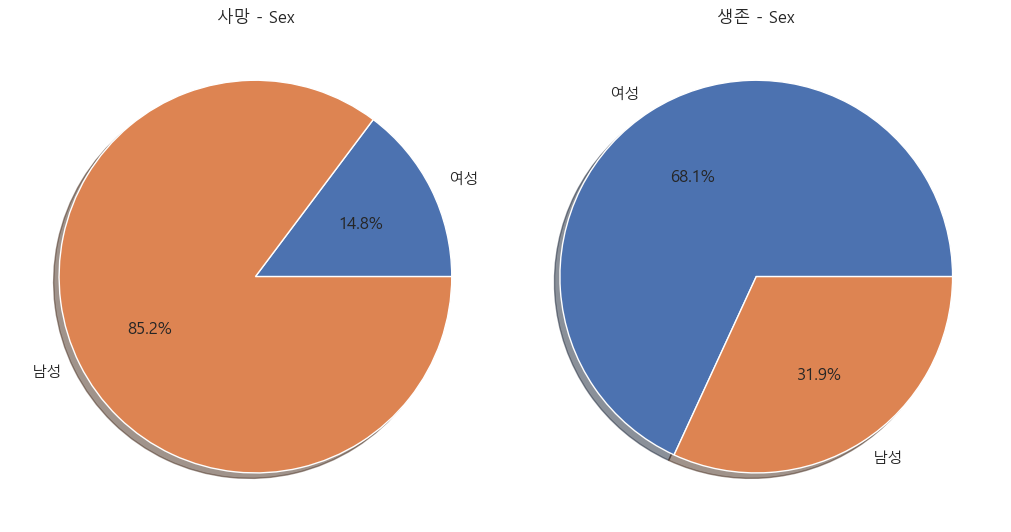

In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,6), constrained_layout=True)
labels = ['여성', '남성']
 
#Survived 가 0인 데이터를 이용한 Pie Plot
train_dt[train_dt['Survived'] == 0]['Sex'].value_counts().sort_index().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='', title='사망 - Sex')
 
#Survived 가 1인 데이터를 이용한 Pie Plot
train_dt[train_dt['Survived'] == 1]['Sex'].value_counts().sort_index().plot.pie(ax=ax[1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[1].set(ylabel='', title='생존 - Sex')
 
plt.show()

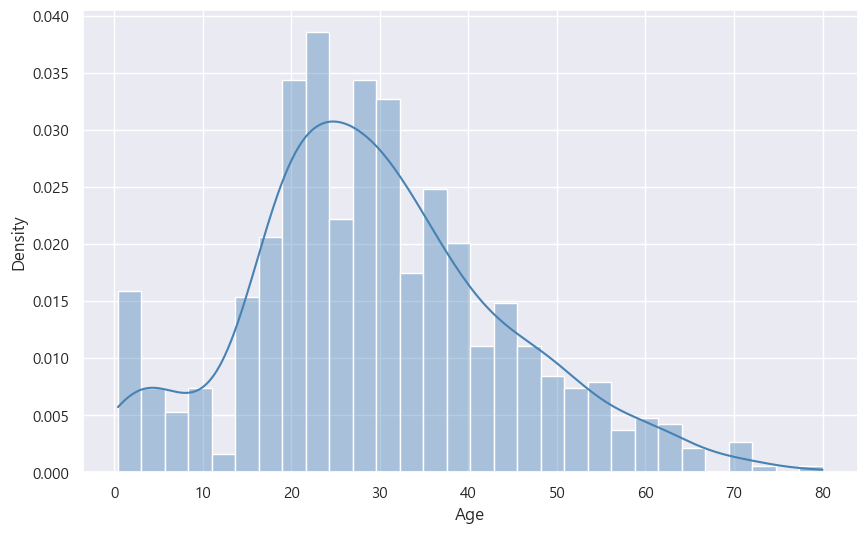

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
 
sns.histplot(train_dt["Age"], bins=30, kde=True, stat="density", color="steelblue", alpha=0.4)
 
plt.show()

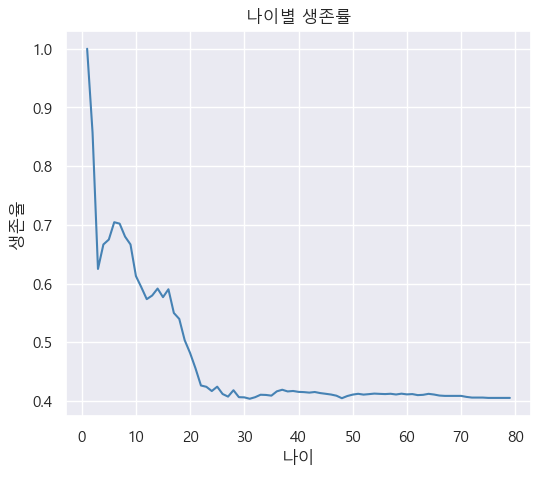

In [21]:
# 생존율을 저장할 리스트 생성
age_range_survival_ratio = []

# 1살부터 80살까지 생존율 계산 (해당 나이 이하인 데이터 활용)
for i in range(1, 80):
    subset = train_dt[train_dt["Age"] < i]  # i살 이하 데이터 필터링
    survival_rate = subset["Survived"].mean() if len(subset) > 0 else 0  # 생존율 계산
    age_range_survival_ratio.append(survival_rate)

# 그래프 크기 설정
plt.figure(figsize=(6, 5))

# 생존율 선 그래프 생성
plt.plot(range(1, 80), age_range_survival_ratio, color="steelblue")

# 제목 및 축 레이블 설정
plt.title("나이별 생존률")
plt.xlabel("나이", fontsize=12)
plt.ylabel("생존율", fontsize=12)

plt.show()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\3631746429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_dt, x="SibSp", palette="muted")


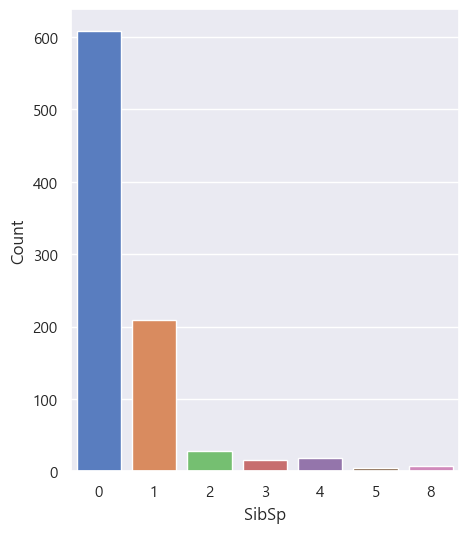

In [22]:
# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(5, 6))

# SibSp 분포를 나타내는 막대 그래프 (Seaborn 기본 색상 사용)
sns.countplot(data=train_dt, x="SibSp", palette="muted")

# 제목 및 축 설정
plt.xlabel("SibSp", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

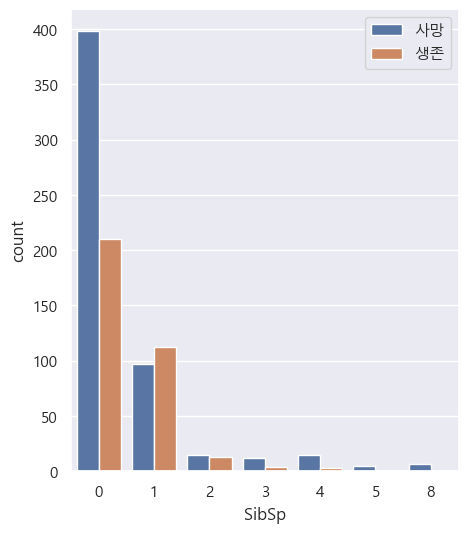

In [23]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='SibSp', hue='Survived', ax=ax)
 
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
 
plt.show()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\2970451873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_dt, x='Parch', palette="muted")


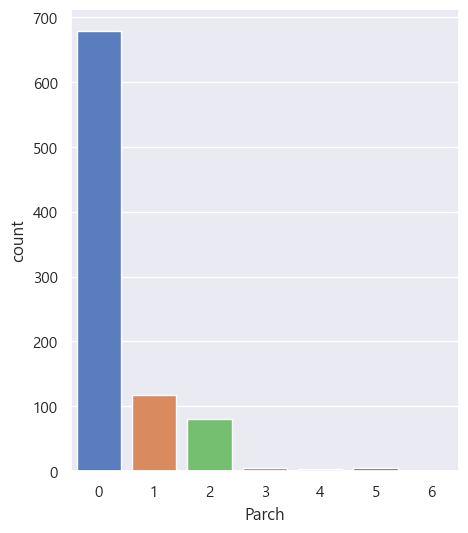

In [24]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='Parch', palette="muted")
 
plt.show()

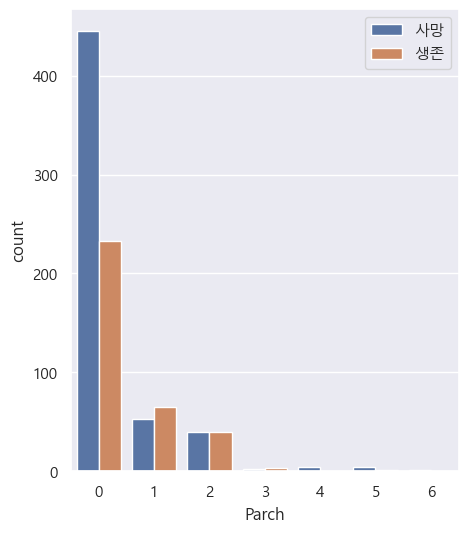

In [25]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='Parch', hue='Survived', ax=ax)
 
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
 
plt.show()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\3846191296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_dt, x='Embarked', palette='muted', ax=ax[1])


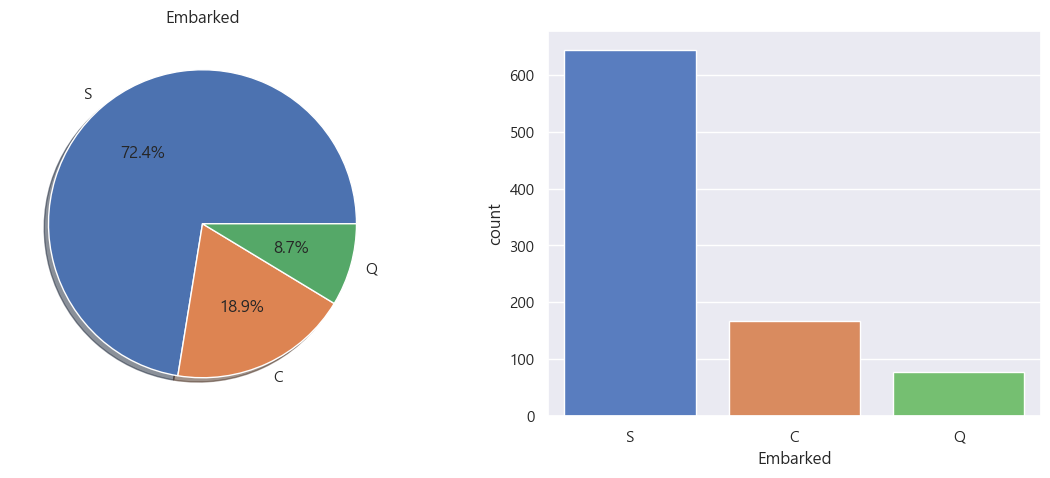

In [26]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
 
train_dt['Embarked'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set(title='Embarked', ylabel='')
 
sns.countplot(data=train_dt, x='Embarked', palette='muted', ax=ax[1])
 
plt.show()

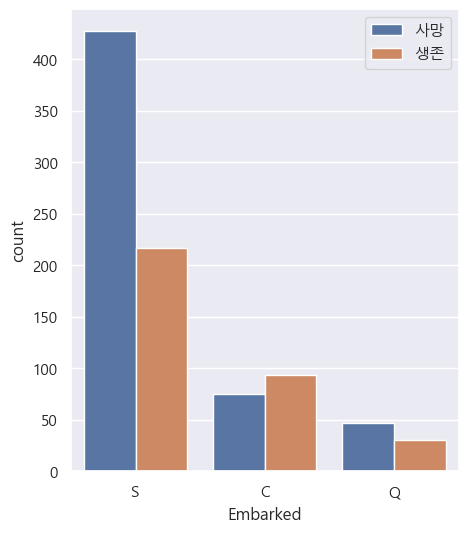

In [27]:
fig, ax = plt.subplots(figsize=(5,6))
 
sns.countplot(data=train_dt, x='Embarked', hue='Survived', ax=ax)
 
#범례 한글로 변경
labels=['사망', '생존']
ax.legend(labels=labels)
 
plt.show()

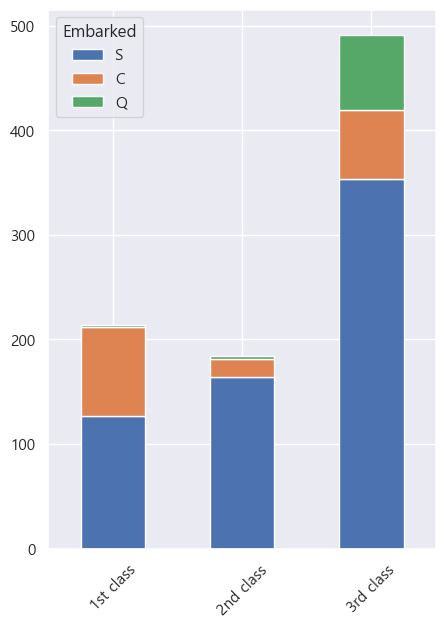

In [28]:
# Pclass 별로 데이터를 나눠줍니다
Pclass1 = train_dt[train_dt['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_dt[train_dt['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_dt[train_dt['Pclass']==3]['Embarked'].value_counts()
 
# DataFrame으로 만들어서 그래프
fig, ax = plt.subplots(figsize=(5,7))
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, ax=ax)
 
# xlabel 회전
plt.xticks(rotation=45)
 
plt.show()

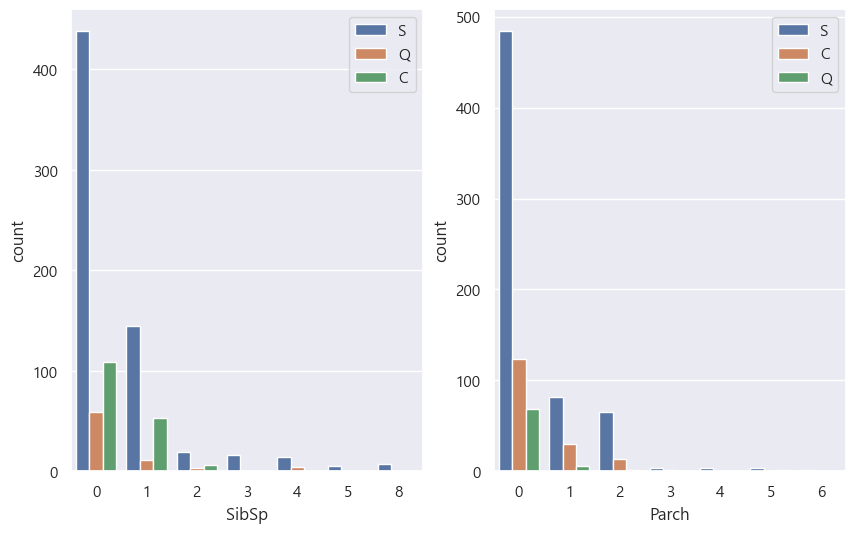

In [29]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
 
sns.countplot(data=train_dt, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train_dt, x='Parch', hue='Embarked', ax=ax[1])
 
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
 
plt.show()

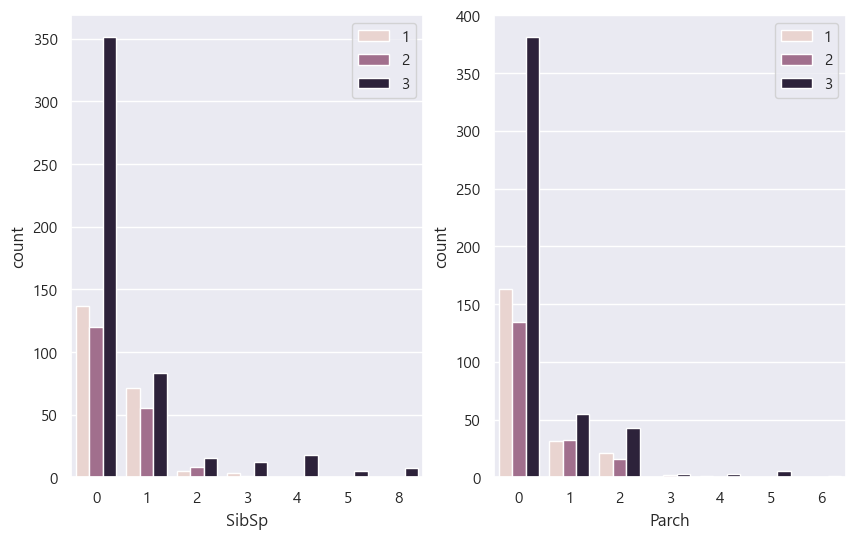

In [30]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
 
sns.countplot(data=train_dt, x='SibSp', hue='Pclass', ax=ax[0])
sns.countplot(data=train_dt, x='Parch', hue='Pclass', ax=ax[1])
 
# 범례 위치조정
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
 
plt.show()

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_13396\2280687450.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_dt['Fare'], bins=25, ax=ax)


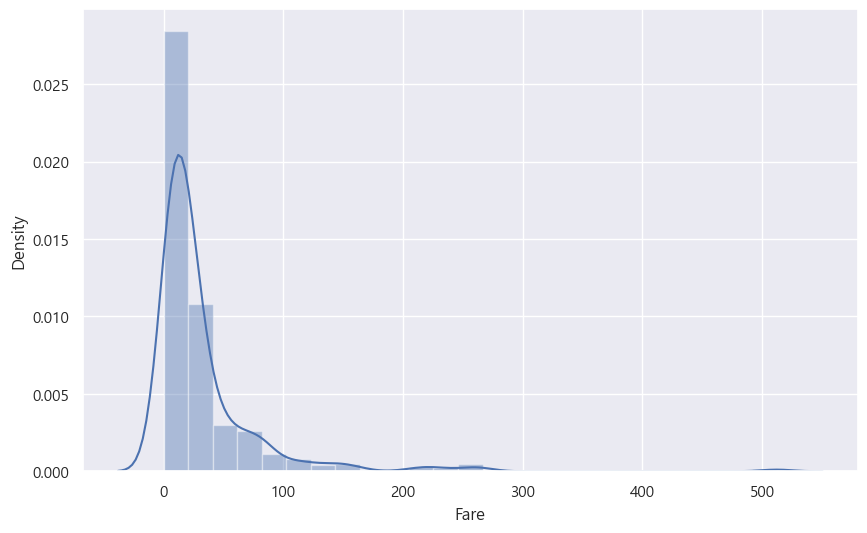

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
 
# 분포확인
sns.distplot(train_dt['Fare'], bins=25, ax=ax)
 
plt.show()

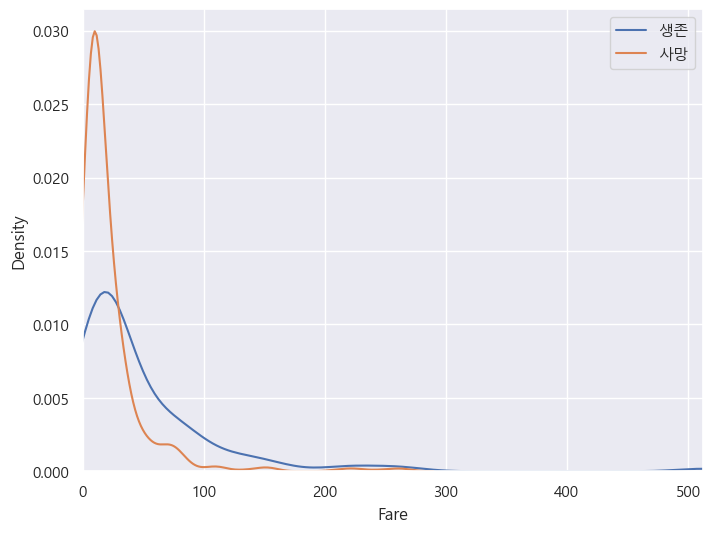

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
 
# 분포 확인
sns.kdeplot(train_dt[train_dt['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_dt[train_dt['Survived']==0]['Fare'], ax=ax)
 
# 가장 높은 가격까지 범위 확대
ax.set(xlim=(0, train_dt['Fare'].max()))
ax.legend(['생존', '사망'])
 
plt.show()

In [33]:
train_dt['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [34]:
train_dt['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',